In [2]:
import pandas as pd

# Define the corrected file paths
sit_to_stand_path = '/Users/kaiyangqian/Downloads/21h9f9e30v9cl2fapjggz4q1x7/SitToStand/Data/STS_human_labels/SitToStand_human_labels.xls'
turning_path = '/Users/kaiyangqian/Downloads/21h9f9e30v9cl2fapjggz4q1x7/Turning/Data/turning_human_labels/Turning_human_labels.xlsx'

# Load the data into DataFrames
sit_to_stand_df = pd.read_excel(sit_to_stand_path)
turning_df = pd.read_excel(turning_path)

# Display the first few rows of each dataset
print(" Sit-To-Stand Data Sample:")
display(sit_to_stand_df.head())

print("\n Turning Data Sample:")
display(turning_df.head())

 Sit-To-Stand Data Sample:


,Transition ID,Participant ID number,PD_or_C,sts_whole_episode_duration,sts_final_attempt_duration,On_or_Off_medication,DBS_state,Clinical_assessment,STS_additional_features,MDS-UPDRS_score_3.9 _arising_from_chair
0,1,596,PD,1.748000,1.209000,On medication,-,Yes,NaN,0.0
1,2,596,PD,2.085000,1.076999,On medication,-,Yes,NaN,0.0
2,3,596,PD,2.610000,1.067999,On medication,-,Yes,Uses arms of chair,2.0
3,4,596,PD,2.478999,1.233000,On medication,-,Yes,Slow,1.0
4,5,596,PD,1.268000,0.801000,On medication,-,Yes,NaN,0.0



 Turning Data Sample:


,Turn ID,Participant ID number,PD_or_C,number_of_turning_steps,turning_angle,type_of_turn,turning_duration,On_or_Off_medication,DBS_state,clinical_assessment
0,0,230,C,4,90_degrees,pivot_turn,1.980999,Control,Control,No
1,2,230,C,2,90_degrees,pivot_turn,1.278000,Control,Control,No
2,4,230,C,2,90_degrees,pivot_turn,1.092999,Control,Control,No
3,5,230,C,2,90_degrees,pivot_turn,1.205999,Control,Control,No
4,7,230,C,2,90_degrees,pivot_turn,1.399000,Control,Control,No


In [3]:
# Check the dimensions (rows and columns)
print("Sit-to-Stand data shape:", sit_to_stand_df.shape)
print("Turning data shape:", turning_df.shape)

# Quick look at missing values in each dataset
print("\nMissing values in Sit-to-Stand data:")
print(sit_to_stand_df.isnull().sum())

print("\nMissing values in Turning data:")
print(turning_df.isnull().sum())

Sit-to-Stand data shape: (403, 10)
Turning data shape: (1749, 10)

Missing values in Sit-to-Stand data:
Transition ID                                0
Participant ID number                        0
PD_or_C                                      0
sts_whole_episode_duration                   0
sts_final_attempt_duration                   0
On_or_Off_medication                         0
DBS_state                                    0
Clinical_assessment                          0
STS_additional_features                    180
MDS-UPDRS_score_3.9 _arising_from_chair      7
dtype: int64

Missing values in Turning data:
Turn ID                    0
Participant ID number      0
PD_or_C                    0
number_of_turning_steps    0
turning_angle              0
type_of_turn               0
turning_duration           0
On_or_Off_medication       0
DBS_state                  0
clinical_assessment        0
dtype: int64


In [4]:
# Descriptive statistics for STS data
print("Sit-to-Stand Descriptive Statistics:")
print(sit_to_stand_df.describe())

# Descriptive statistics for Turning data
print("\nTurning Descriptive Statistics:")
print(turning_df.describe())

Sit-to-Stand Descriptive Statistics:
       Transition ID  Participant ID number  sts_whole_episode_duration  \
count     403.000000             403.000000                  403.000000   
mean      398.950372             497.868486                    2.259871   
std       233.360700             228.433232                    1.400173   
min         1.000000             204.000000                    0.566000   
25%       211.000000             324.000000                    1.536500   
50%       399.000000             412.000000                    1.952999   
75%       588.000000             744.000000                    2.575499   
max       817.000000             971.000000                   13.670999   

       sts_final_attempt_duration  MDS-UPDRS_score_3.9 _arising_from_chair  
count                  403.000000                               396.000000  
mean                     1.267630                                 0.934343  
std                      0.876530                       

In [5]:
# Sit-to-stand duration analysis by medication status
print("\n Sit-To-Stand Duration Analysis (On vs Off Medication):")
print(sit_to_stand_df.groupby('On_or_Off_medication')['sts_whole_episode_duration'].describe())

# Turning duration analysis by medication status
print("\n Turning Duration Analysis (On vs Off Medication):")
print(turning_df.groupby('On_or_Off_medication')['turning_duration'].describe())


 Sit-To-Stand Duration Analysis (On vs Off Medication):
                      count      mean       std    min       25%       50%  \
On_or_Off_medication                                                         
-                      26.0  2.850192  1.399510  1.479  1.928749  2.601500   
Control               170.0  1.822594  0.809065  0.566  1.311250  1.698999   
Off medication         68.0  2.882558  1.860419  1.000  2.037749  2.428500   
On medication         139.0  2.379626  1.538635  0.860  1.677999  1.982000   

                           75%        max  
On_or_Off_medication                       
-                     3.234500   8.294000  
Control               2.083250   6.028999  
Off medication        3.105250  13.670999  
On medication         2.600499  13.340999  

 Turning Duration Analysis (On vs Off Medication):
                      count      mean       std       min      25%       50%  \
On_or_Off_medication                                                          

In [11]:
# For participant type (PD or Control)
print("Participant types in STS data:", sit_to_stand_df["PD_or_C"].unique())
print("Participant types in Turning data:", turning_df["PD_or_C"].unique())

# Count frequency of medication status
print("\nMedication Status in Turning data:")
print(turning_df["On_or_Off_medication"].value_counts())

print("\nMedication Status in STS data:")
print(sit_to_stand_df["On_or_Off_medication"].value_counts())

# Distribution of turning angles
print("\nTurning Angle Distribution:")
print(turning_df["turning_angle"].value_counts())

# # STS additional features summary
# print("\nSTS Additional Features:")
# print(sit_to_stand_df["STS_additional_features"].value_counts())

Participant types in STS data: ['PD' 'C']
Participant types in Turning data: ['C' 'PD']

Medication Status in Turning data:
On_or_Off_medication
Control           786
On medication     749
Off medication    214
Name: count, dtype: int64

Medication Status in STS data:
On_or_Off_medication
Control           170
On medication     139
Off medication     68
-                  26
Name: count, dtype: int64

Turning Angle Distribution:
turning_angle
90_degrees     954
180_degrees    559
135_degrees    228
225_degrees      6
270_degrees      1
360_degrees      1
Name: count, dtype: int64


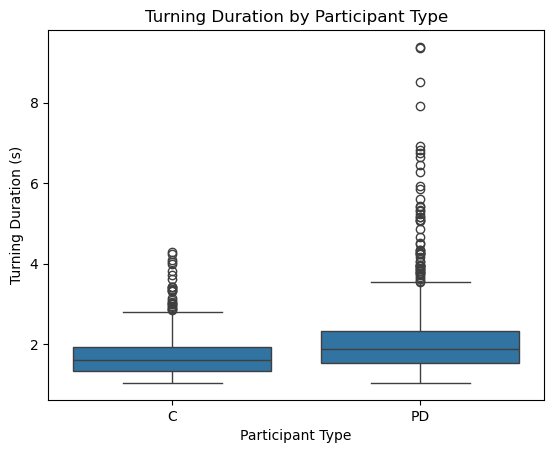

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="PD_or_C", y="turning_duration", data=turning_df)
plt.title("Turning Duration by Participant Type")
plt.xlabel("Participant Type")
plt.ylabel("Turning Duration (s)")
plt.show()

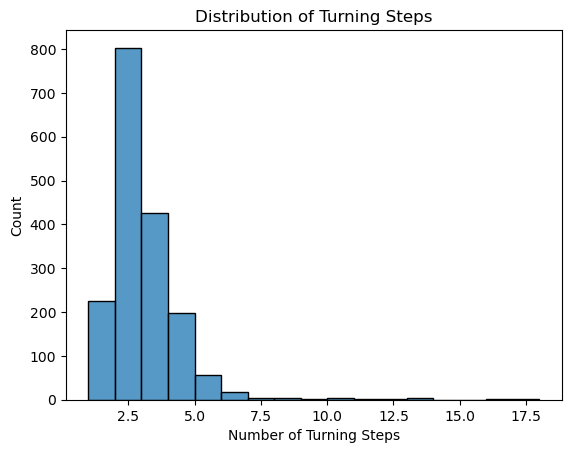

In [8]:
sns.histplot(turning_df["number_of_turning_steps"], bins=range(int(turning_df["number_of_turning_steps"].min()),
                                                                  int(turning_df["number_of_turning_steps"].max()) + 1),
             kde=False)
plt.title("Distribution of Turning Steps")
plt.xlabel("Number of Turning Steps")
plt.ylabel("Count")
plt.show()

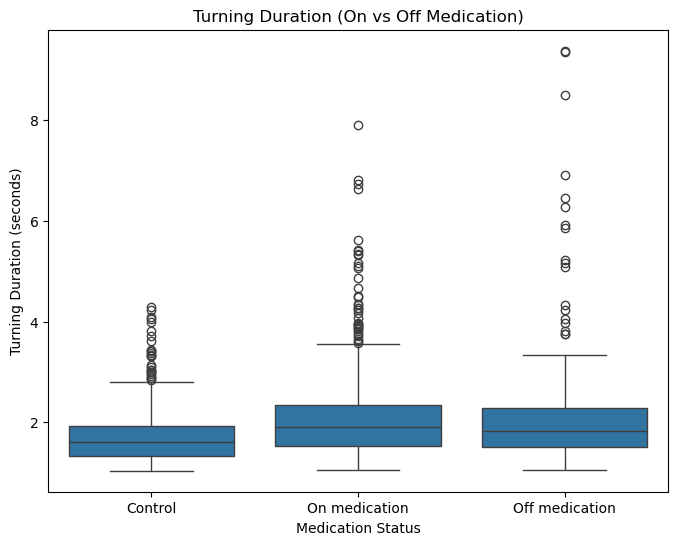

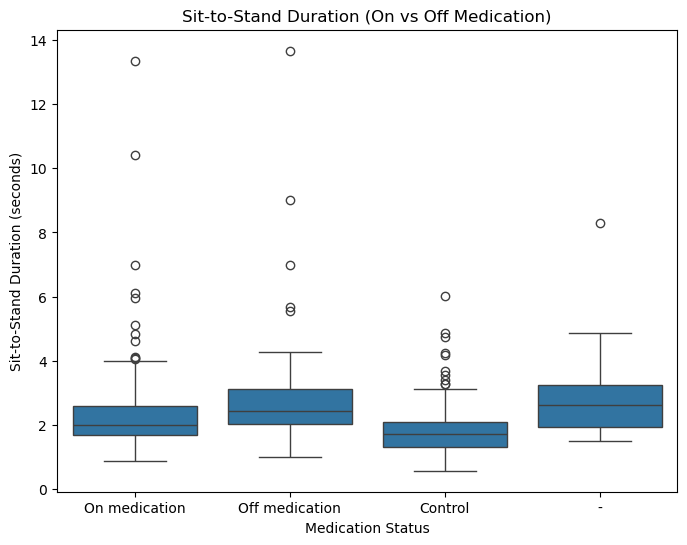

In [9]:
# Boxplot for turning duration
plt.figure(figsize=(8, 6))
sns.boxplot(data=turning_df, x='On_or_Off_medication', y='turning_duration')
plt.title('Turning Duration (On vs Off Medication)')
plt.xlabel('Medication Status')
plt.ylabel('Turning Duration (seconds)')
plt.show()

# Boxplot for sit-to-stand duration
plt.figure(figsize=(8, 6))
sns.boxplot(data=sit_to_stand_df, x='On_or_Off_medication', y='sts_whole_episode_duration')
plt.title('Sit-to-Stand Duration (On vs Off Medication)')
plt.xlabel('Medication Status')
plt.ylabel('Sit-to-Stand Duration (seconds)')
plt.show()